# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.023447e+01     7.689214e+00
 * time: 0.0018417835235595703
     1     2.832650e+01     5.067985e+00
 * time: 0.007782936096191406
     2     1.968579e+01     5.036830e+00
 * time: 0.012836933135986328
     3     1.399874e+01     4.429755e+00
 * time: 0.017270803451538086
     4     1.104255e+01     1.657970e+00
 * time: 0.021408796310424805
     5     1.025152e+01     2.663730e+00
 * time: 0.02485489845275879
     6     9.656151e+00     1.339120e+00
 * time: 0.028809785842895508
     7     9.102576e+00     1.369941e+00
 * time: 0.032521963119506836
     8     8.676460e+00     1.373570e+00
 * time: 0.03690481185913086
     9     8.423539e+00     1.104672e+00
 * time: 0.043054819107055664
    10     8.295097e+00     9.424525e-01
 * time: 0.04936385154724121
    11     8.181389e+00     9.501676e-01
 * time: 0.05540800094604492
    12     8.080370e+00     5.156117e-01
 * time: 0.061273813247680664
    13     8.023383e+00     6.193743e-0

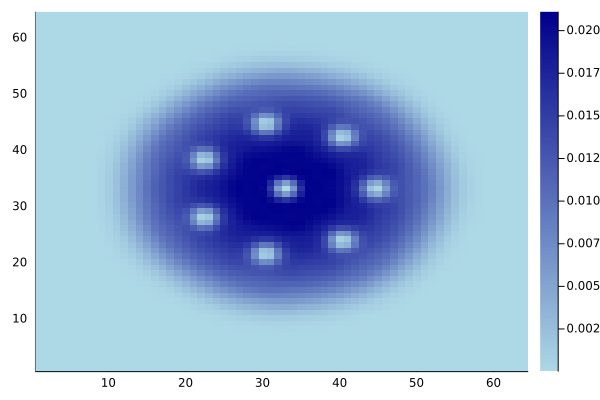

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)